<div class="alert alert-block alert-info">
    <b>GOAL:</b>
    
To predict Crash Severity of the test dataset based on <b>roc-auc</b> evaluation criterion recommended for this business context </div>

# Preprocessing ``train.csv``

In [64]:
#Import all required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,8)

import warnings
warnings.filterwarnings("ignore")

In [65]:
# Import dataset
df_train = pd.read_csv('train.csv')

In [66]:
# Below categorical columns has to be transformed into numerical and nulls has to be handled to aid modelling
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2322 entries, 0 to 2321
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   $1000 Damage to Any One Person's Property  2322 non-null   object
 1   Bridge Detail                              2322 non-null   object
 2   Construction Zone Flag                     2322 non-null   object
 3   Construction Zone Workers Present Flag     2322 non-null   object
 4   Crash Time                                 2322 non-null   int64 
 5   Day of Week                                2322 non-null   object
 6   Highway System                             2322 non-null   object
 7   Intersecting Highway Number                2322 non-null   object
 8   Intersecting Street Name                   541 non-null    object
 9   Manner of Collision                        2322 non-null   object
 10  Median Type                         

In [67]:
df_train.head()

,$1000 Damage to Any One Person's Property,Bridge Detail,Construction Zone Flag,Construction Zone Workers Present Flag,Crash Time,Day of Week,Highway System,Intersecting Highway Number,Intersecting Street Name,Manner of Collision,Median Type,Median Width,Number of Entering Roads,Number of Lanes,Surface Condition,Surface Type,Surface Width,Weather Condition,Crash Severity
0,Yes,NOT APPLICABLE,No,No,638,TUESDAY,STATE SPUR,No Data,NaN,SAME DIRECTION - ONE STRAIGHT-ONE STOPPED,No Data,40,97 - NOT APPLICABLE,8,1 - DRY,No Data,96,1 - CLEAR,Not serious
1,Yes,NOT APPLICABLE,No,No,1658,SUNDAY,STATE SPUR,No Data,N FIELD ST,ANGLE - BOTH GOING STRAIGHT,No Data,40,97 - NOT APPLICABLE,8,2 - WET,No Data,96,3 - RAIN,Not serious
2,Yes,NOT APPLICABLE,No,No,1715,WEDNESDAY,STATE SPUR,No Data,AKARD ST,SAME DIRECTION - ONE STRAIGHT-ONE LEFT TURN,No Data,No Data,97 - NOT APPLICABLE,No Data,1 - DRY,No Data,No Data,2 - CLOUDY,Not serious
3,Yes,NOT APPLICABLE,No,No,1817,FRIDAY,STATE SPUR,No Data,NaN,SAME DIRECTION - BOTH GOING STRAIGHT-REAR END,No Data,40,97 - NOT APPLICABLE,8,1 - DRY,No Data,96,1 - CLEAR,Not serious
4,Yes,NOT APPLICABLE,No,No,1950,SUNDAY,STATE SPUR,345,IH0345,ANGLE - BOTH GOING STRAIGHT,No Data,40,4 - FOUR ENTERING ROADS,8,1 - DRY,No Data,96,1 - CLEAR,Not serious


In [68]:
print("Train data has ", df_train.shape[0], 'rows and ', df_train.shape[1], 'columns')

Train data has  2322 rows and  19 columns


In [69]:
# Total nulls
df_train.isnull().sum().sum()

1781

In [70]:
# Feature-wise null percentage
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Intersecting Street Name,1781,0.767011
$1000 Damage to Any One Person's Property,0,0.000000
Median Type,0,0.000000
Weather Condition,0,0.000000
Surface Width,0,0.000000
Surface Type,0,0.000000
Surface Condition,0,0.000000
Number of Lanes,0,0.000000
Number of Entering Roads,0,0.000000
Median Width,0,0.000000


In [71]:
# Implies there are 27 duplicates
sum(df_train.duplicated())

27

In [72]:
# Determine if duplicated instances are good to be dropped
df_train[df_train.duplicated(keep=False)].sort_values(by=["Crash Time"])

,$1000 Damage to Any One Person's Property,Bridge Detail,Construction Zone Flag,Construction Zone Workers Present Flag,Crash Time,Day of Week,Highway System,Intersecting Highway Number,Intersecting Street Name,Manner of Collision,Median Type,Median Width,Number of Entering Roads,Number of Lanes,Surface Condition,Surface Type,Surface Width,Weather Condition,Crash Severity
186,Yes,NOT APPLICABLE,No,No,157,THURSDAY,STATE SPUR,35,IH0035E,ONE MOTOR VEHICLE - GOING STRAIGHT,No Data,40,97 - NOT APPLICABLE,6,1 - DRY,No Data,72,1 - CLEAR,Not serious
453,Yes,NOT APPLICABLE,No,No,157,THURSDAY,STATE SPUR,35,IH0035E,ONE MOTOR VEHICLE - GOING STRAIGHT,No Data,40,97 - NOT APPLICABLE,6,1 - DRY,No Data,72,1 - CLEAR,Not serious
1145,No,NOT APPLICABLE,No,No,815,TUESDAY,STATE SPUR,No Data,NaN,SAME DIRECTION - ONE STRAIGHT-ONE STOPPED,No Data,40,97 - NOT APPLICABLE,8,1 - DRY,No Data,96,1 - CLEAR,Not serious
1808,No,NOT APPLICABLE,No,No,815,TUESDAY,STATE SPUR,No Data,NaN,SAME DIRECTION - ONE STRAIGHT-ONE STOPPED,No Data,40,97 - NOT APPLICABLE,8,1 - DRY,No Data,96,1 - CLEAR,Not serious
2293,Yes,NOT APPLICABLE,No,No,820,WEDNESDAY,STATE SPUR,No Data,NaN,SAME DIRECTION - BOTH GOING STRAIGHT-REAR END,No Data,40,97 - NOT APPLICABLE,8,1 - DRY,No Data,96,1 - CLEAR,Not serious
242,Yes,NOT APPLICABLE,No,No,820,WEDNESDAY,STATE SPUR,No Data,NaN,SAME DIRECTION - BOTH GOING STRAIGHT-REAR END,No Data,40,97 - NOT APPLICABLE,8,1 - DRY,No Data,96,1 - CLEAR,Not serious
321,Yes,NOT APPLICABLE,No,No,820,FRIDAY,STATE SPUR,No Data,NaN,SAME DIRECTION - ONE STRAIGHT-ONE STOPPED,No Data,40,97 - NOT APPLICABLE,8,1 - DRY,No Data,96,1 - CLEAR,Not serious
476,Yes,NOT APPLICABLE,No,No,820,FRIDAY,STATE SPUR,No Data,NaN,SAME DIRECTION - ONE STRAIGHT-ONE STOPPED,No Data,40,97 - NOT APPLICABLE,8,1 - DRY,No Data,96,1 - CLEAR,Not serious
1551,Yes,NOT APPLICABLE,No,No,940,THURSDAY,STATE SPUR,No Data,NaN,SAME DIRECTION - ONE STRAIGHT-ONE STOPPED,No Data,40,97 - NOT APPLICABLE,8,1 - DRY,No Data,96,1 - CLEAR,Not serious
1982,Yes,NOT APPLICABLE,No,No,940,THURSDAY,STATE SPUR,No Data,NaN,SAME DIRECTION - ONE STRAIGHT-ONE STOPPED,No Data,40,97 - NOT APPLICABLE,8,1 - DRY,No Data,96,1 - CLEAR,Not serious


In [73]:
# Duplicates can be dropped in train dataset as they are redundant instances and might add unecessary weightage owing to repetitions
df_train.drop_duplicates(inplace=True)

In [74]:
# Duplicates post processing
sum(df_train.duplicated())

0

### Target Variable: Crash Severity

Crash Severity proportions are 
 Not serious    0.984314
Serious        0.015686
Name: Crash Severity, dtype: float64


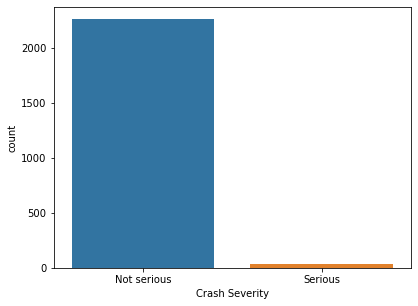

In [75]:
import seaborn as sns

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
sns.countplot(df_train['Crash Severity']);

print ('Crash Severity proportions are \n',df_train['Crash Severity'].value_counts() / df_train['Crash Severity'].count())

Its not a well balanced dataset since its in 98:2 ratio so ``roc_auc`` can be considered as a better evaluation criterion in this context


In [76]:
df_train['Crash Severity'].value_counts(dropna=False)

Not serious    2259
Serious          36
Name: Crash Severity, dtype: int64

### Feature: $1000 Damage to Any One Person's Property

<AxesSubplot:xlabel="$1000 Damage to Any One Person's Property">

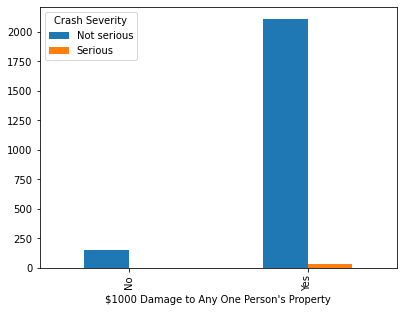

In [77]:
pd.crosstab(df_train['$1000 Damage to Any One Person\'s Property'], df_train['Crash Severity']).plot(kind = 'bar')

In [78]:
pclass_xt = pd.crosstab(df_train['$1000 Damage to Any One Person\'s Property'], df_train['Crash Severity'])
pclass_xt

Crash Severity,Not serious,Serious
$1000 Damage to Any One Person's Property,,
No,154,0
Yes,2105,36


Its obvious that severe crashes mostly have ``$1000 Damage to Any One Person's Property`` feature involved since there are are 0 cases which are reported as severe and yet didnt have  ``$1000 Damage to Any One Person's Property``

In [79]:
df_train['$1000 Damage to Any One Person\'s Property'].value_counts()

Yes    2141
No      154
Name: $1000 Damage to Any One Person's Property, dtype: int64

In [80]:
# Binomial column: Mapping 1 to the most frequent class of Damage ie., Yes
df_train['$1000 Damage to Any One Person\'s Property'] = df_train['$1000 Damage to Any One Person\'s Property'].map({'Yes':1, 'No':0}).astype(int)

### Feature: Bridge Detail

In [81]:
df_train['Bridge Detail'].value_counts(dropna = False)

NOT APPLICABLE                            2269
STRUCTURE NOT HIT                           11
VEHICLE RETAINED ON BRIDGE OR OVERPASS       8
CRASH INVOLVED UNDERPASS                     6
VEHICLE WENT OVER RAIL                       1
Name: Bridge Detail, dtype: int64

In [82]:
cols = pd.get_dummies(df_train['Bridge Detail'], prefix= 'Bridge Detail')
df_train[cols.columns] = cols
df_train.drop('Bridge Detail', axis = 1, inplace = True)

### Feature: Construction Zone Flag

<AxesSubplot:xlabel='Construction Zone Flag'>

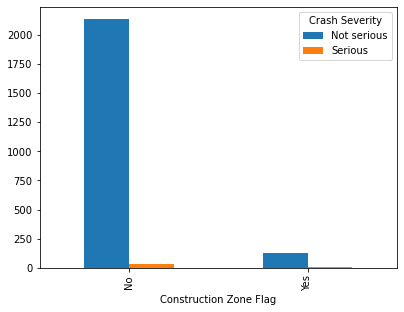

In [83]:
pd.crosstab(df_train['Construction Zone Flag'], df_train['Crash Severity']).plot(kind = 'bar')

In [84]:
pclass_xt = pd.crosstab(df_train['Construction Zone Flag'], df_train['Crash Severity'], normalize='index')
pclass_xt

Crash Severity,Not serious,Serious
Construction Zone Flag,,
No,0.985213,0.014787
Yes,0.969466,0.030534


From above, we can infer that construction zone contributes to 3% of serious crashes whereas non-construction site contributes to just 1% of the serious crashes recorded

In [85]:
df_train['Construction Zone Flag'].value_counts(dropna = False)

No     2164
Yes     131
Name: Construction Zone Flag, dtype: int64

In [86]:
# Binomial column: Mapping 1 to the most frequent class of const zone ie., No
df_train['Construction Zone Flag'] = df_train['Construction Zone Flag'].map({'No':1, 'Yes':0}).astype(int)

### Feature: Construction Zone Workers Present Flag

In [87]:
pclass_xt = pd.crosstab(df_train['Construction Zone Workers Present Flag'], df_train['Crash Severity'])
pclass_xt

Crash Severity,Not serious,Serious
Construction Zone Workers Present Flag,,
No,2216,36
Yes,43,0


In [88]:
print(df_train['Crash Severity'].value_counts() / df_train['Crash Severity'].count())

Not serious    0.984314
Serious        0.015686
Name: Crash Severity, dtype: float64


<AxesSubplot:xlabel='Construction Zone Workers Present Flag'>

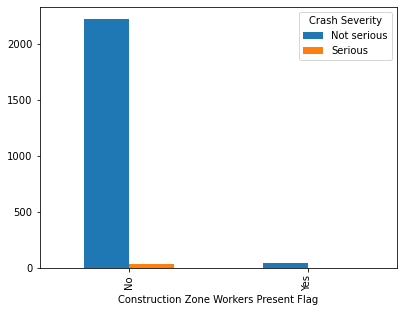

In [89]:
pd.crosstab(df_train['Construction Zone Workers Present Flag'], df_train['Crash Severity']).plot(kind = 'bar')

From above countplots, we can infer that construction zone contributes to 3% of serious crashes whereas non-construction zones contribute to just 1% of the serious crashes recorded whilst the Construction Zone Workers Present Flag doesnt seem to be much significant. Hence construction zone, despite the presence of workers at the construction site or not seem to play a crucial role in crash severity

In [90]:
df_train['Construction Zone Workers Present Flag'].value_counts(dropna = False)

No     2252
Yes      43
Name: Construction Zone Workers Present Flag, dtype: int64

In [91]:
# Binomial column: Mapping 1 to the most frequent class of const zone ie., No
df_train['Construction Zone Workers Present Flag'] = df_train['Construction Zone Workers Present Flag'].map({'No':1, 'Yes':0}).astype(int)

### Feature: Crash Time

Text(0, 0.5, 'Count')

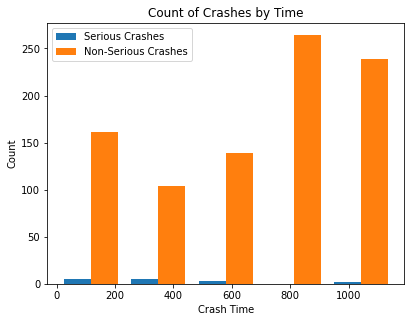

In [92]:
df1 = df_train[df_train['Crash Severity'] == 'Serious']['Crash Time']
df2 = df_train[df_train['Crash Severity'] == 'Not serious']['Crash Time']

plt.hist([df1, df2], bins=5, range=(1, 1159))
plt.legend(('Serious Crashes', 'Non-Serious Crashes'), loc='best')
plt.title('Count of Crashes by Time')
plt.xlabel('Crash Time')
plt.ylabel('Count')

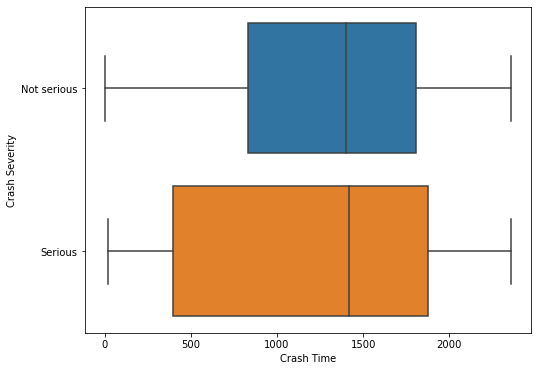

In [93]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Crash Time', y='Crash Severity',data=df_train);

Serious crashes are prone to happen in early morning over non-serious crashes and there are not any outliers

Text(0.5, 1.0, 'Number of serious crashes by crash time')

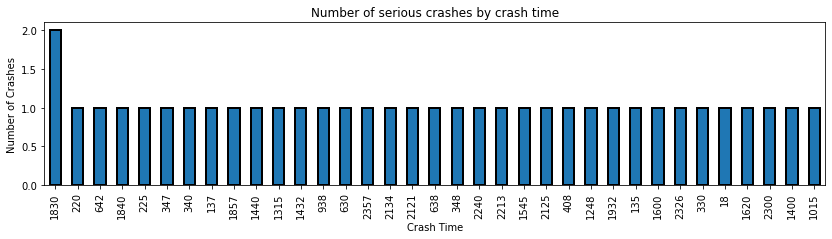

In [94]:
fig, ax=plt.subplots(figsize=(14,3))
df_train[df_train['Crash Severity']=='Serious']['Crash Time'].value_counts().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Crash Time',fontsize=10)
plt.ylabel('Number of Crashes',fontsize=10)
ax.tick_params(labelsize=10)
plt.title('Number of serious crashes by crash time',fontsize=12)

<AxesSubplot:xlabel='Crash Time', ylabel='Count'>

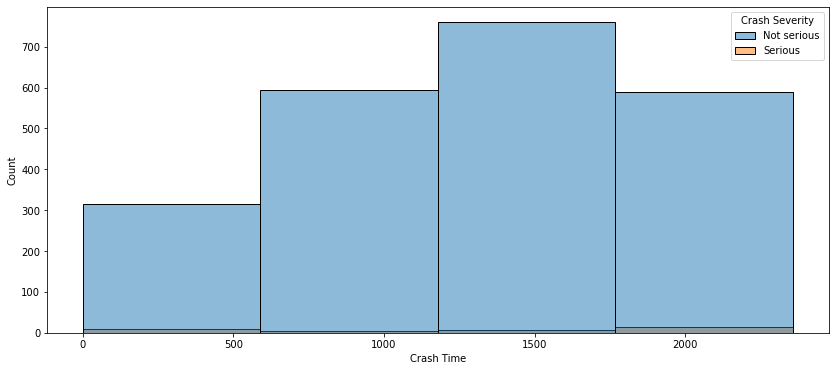

In [95]:
plt.figure(figsize=(14,6))
# Simulated various number of bin size to categorize based on serious crashes distribution and found 4 to be better bin size
sns.histplot(x='Crash Time', hue='Crash Severity', data=df_train, bins=4)

From above analysis, Servere crashes seem to be high during 12AM to 6AM (0-600 Hrs) and around 550PM to 1159PM (1750-1159 Hrs).
Hence Crash Time has been categorized into 4 bins - earlymorning, morning, noon and night based on above histogram whose mapping is as follows

In [96]:
df_train['Crash Time'] = df_train['Crash Time'].apply(lambda x: "early morning" if x >=0 and x<= 600 \
                        else ('morning' if x >=601 and x<= 1200 else 'noon' if x >=1201 and x<= 1750 else 'night') )

In [97]:
# Serious + NonSerious Crashes by time of day
df_train['Crash Time'].value_counts(dropna = False)

noon             756
night            606
morning          598
early morning    335
Name: Crash Time, dtype: int64

Text(0.5, 1.0, 'Time of Day of serious crashes')

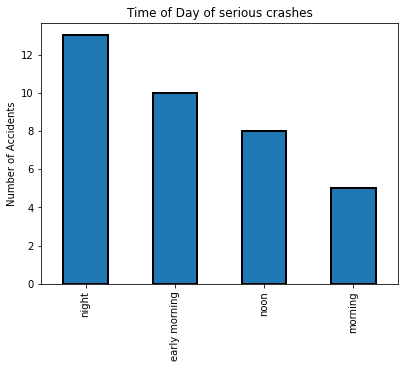

In [98]:
df_train[df_train['Crash Severity']=='Serious']['Crash Time'].value_counts().sort_values(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.ylabel('Number of Accidents',fontsize=10)
ax.tick_params(labelsize=10)
plt.title('Time of Day of serious crashes',fontsize=12)

From above its evident that more serious crashes happen during Night and early morning times which is logical as well

In [99]:
cols = pd.get_dummies(df_train['Crash Time'], prefix= 'Crash Time')
df_train[cols.columns] = cols
df_train.drop('Crash Time', axis = 1, inplace = True)

### Feature: Day of Week

In [100]:
pclass_xt = pd.crosstab(df_train['Day of Week'], df_train['Crash Severity'])
pclass_xt

Crash Severity,Not serious,Serious
Day of Week,,
FRIDAY,380,6
MONDAY,293,4
SATURDAY,348,7
SUNDAY,278,6
THURSDAY,304,5
TUESDAY,335,4
WEDNESDAY,321,4


Text(0, 0.5, 'Crash Severity')

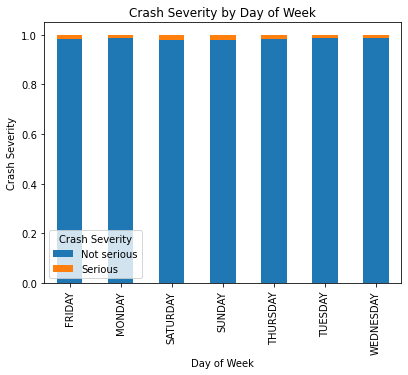

In [101]:
# Normalize the cross tab to sum to 1
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1), axis=0)

pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Crash Severity by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Crash Severity')

In [102]:
# Categorizing as 'WeekBeginning', 'MidWeek' and 'Weekends' for better context
df_train['Day of Week'] = df_train['Day of Week'].apply(lambda x: "Week Beginning" if x =='MONDAY' or x=='TUESDAY' else ('Mid Week' if x == 'WEDNESDAY' or x == 'THURSDAY' else 'Week End') )

Text(0.5, 1.0, 'Day of Week of serious crashes')

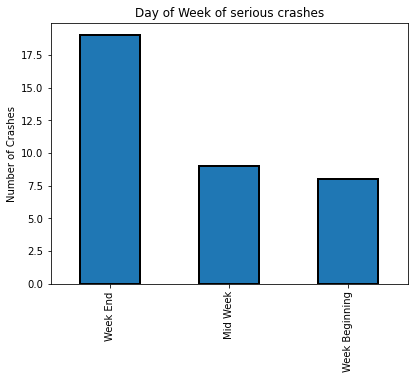

In [103]:
df_train[df_train['Crash Severity']=='Serious']['Day of Week'].value_counts().sort_values(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.ylabel('Number of Crashes',fontsize=10)
ax.tick_params(labelsize=10)
plt.title('Day of Week of serious crashes',fontsize=12)

In [104]:
cols = pd.get_dummies(df_train['Day of Week'], prefix= 'Day of Week')
df_train[cols.columns] = cols
df_train.drop('Day of Week', axis = 1, inplace = True)

### Feature: Weather Condition

Text(0.5, 1.0, 'Top 5 Weather Conditions for crashes')

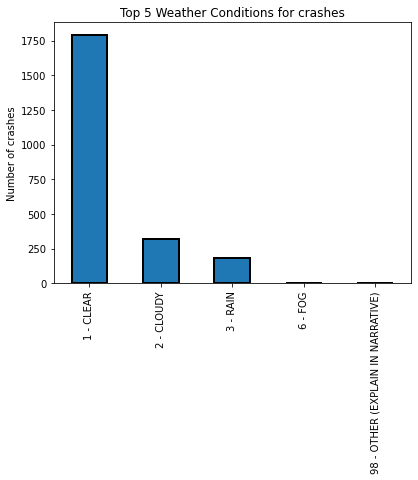

In [105]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

df_train['Weather Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.ylabel('Number of crashes',fontsize=10)
ax.tick_params(labelsize=10)
plt.title('Top 5 Weather Conditions for crashes',fontsize=12)

Text(0.5, 1.0, 'Serious Crashes by weather')

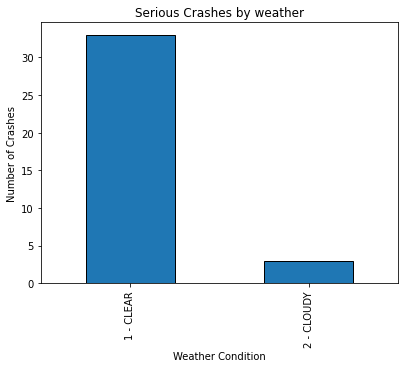

In [106]:
# Distribution of serious crashes by weather
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

df_train[df_train['Crash Severity']=='Serious']['Weather Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(edgecolor='k',align='center')
plt.xlabel('Weather Condition',fontsize=10)
plt.ylabel('Number of Crashes',fontsize=10)
ax.tick_params(labelsize=10)
plt.title('Serious Crashes by weather',fontsize=12)

Against intuition, Foggy or rainy weather conditions doesnt seem to much contribute towards crash severity

### Feature: Manner of Collision

In [107]:
df_train['Manner of Collision'].value_counts(dropna=False)

cols = pd.get_dummies(df_train['Manner of Collision'], prefix= 'Manner of Collision')
df_train[cols.columns] = cols
df_train.drop('Manner of Collision', axis = 1, inplace = True)

## Features with high missing values

### Feature: Intersecting Street Name

In [108]:
df_train['Intersecting Street Name'].value_counts(dropna = False)

NaN                       1755
IH0035E                    220
IH0345                     146
N PEARL ST                  21
N FIELD ST                  18
OLIVE ST                    14
AKARD ST                    14
N AKARD ST                  14
ROUTH ST                    13
N ST PAUL ST                11
FIELD ST                    11
PEARL ST                     8
US0075                       7
MAPLE ROUTH CONNECTION       5
ROSS AVE                     4
N OLIVE ST                   4
N RIVERFRONT BLVD            3
NOT REPORTED                 3
BOLL ST                      2
HARWOOD ST                   2
N BECKLEY AVE                2
ST PAUL ST                   2
N HARWOOD ST                 1
N PEARL                      1
SAN JACINTO ST               1
COLUMBUS ST                  1
BECKLEY AVE                  1
LEMMON AVE                   1
STPAUL ST                    1
N AKARO ST                   1
ROUTH AVE                    1
MAPLE ROUTH                  1
SAINT PA

Text(0.5, 1.0, 'Intersecting Street Name of overall crashes')

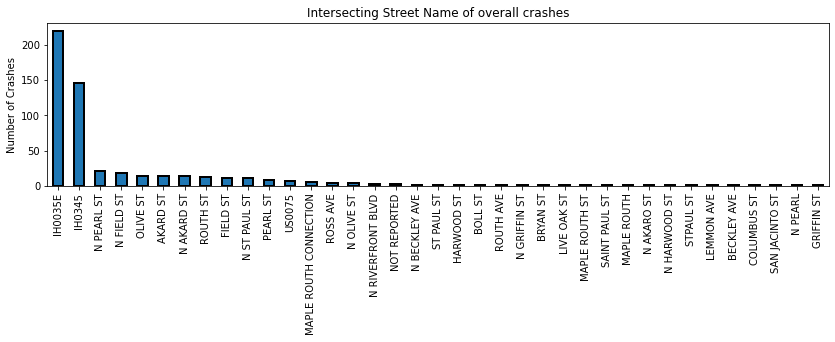

In [109]:
fig, ax=plt.subplots(figsize=(14,3))
df_train['Intersecting Street Name'].value_counts().sort_values(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.ylabel('Number of Crashes',fontsize=10)
ax.tick_params(labelsize=10)
plt.title('Intersecting Street Name of overall crashes',fontsize=12)

Text(0.5, 1.0, 'Intersecting Street Name of serious crashes')

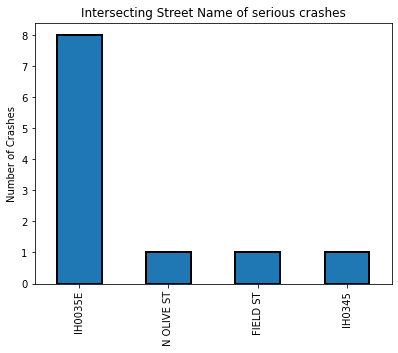

In [110]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

df_train[df_train['Crash Severity']=='Serious']['Intersecting Street Name'].value_counts().sort_values(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.ylabel('Number of Crashes',fontsize=10)
ax.tick_params(labelsize=10)
plt.title('Intersecting Street Name of serious crashes', fontsize=12)

### Feature: Intersecting Highway Number

In [111]:
df_train['Intersecting Highway Number'].value_counts(dropna = False)

No Data    1922
35          220
345         146
75            7
Name: Intersecting Highway Number, dtype: int64

### Feature: Highway System

In [112]:
df_train['Highway System'].value_counts(dropna = False)

STATE SPUR    2295
Name: Highway System, dtype: int64

### Feature: Median Width

In [113]:
df_train['Median Width'].value_counts(dropna = False)

40         1775
No Data     520
Name: Median Width, dtype: int64

### Feature: Median Type

In [114]:
df_train['Median Type'].value_counts(dropna = False)

No Data        2235
UNPROTECTED      60
Name: Median Type, dtype: int64

### Feature: Surface Type

In [115]:
df_train['Surface Type'].value_counts(dropna = False)

No Data    2295
Name: Surface Type, dtype: int64

Owing to high % of nulls in the above 6 variables and also upon analysis they doesnt seem to contribute to the variance of target variable. Hence they are dropped

In [116]:
df_train.drop('Highway System', axis=1, inplace=True)
df_train.drop('Intersecting Highway Number', axis=1, inplace=True)
df_train.drop('Intersecting Street Name', axis=1, inplace=True)

df_train.drop('Median Width', axis=1, inplace=True)
df_train.drop('Median Type', axis=1, inplace=True)
df_train.drop('Surface Type', axis=1, inplace=True)

### Feature: Number of entering roads

In [117]:
df_train['Number of Entering Roads'].value_counts(dropna=False)

97 - NOT APPLICABLE                  1953
4 - FOUR ENTERING ROADS               193
2 - THREE ENTERING ROADS - T           68
98 - OTHER (EXPLAIN IN NARRATIVE)      44
3 - THREE ENTERING ROADS - Y           31
5 - FIVE ENTERING ROADS                 2
6 - SIX ENTERING ROADS                  2
8 - CLOVERLEAF                          2
Name: Number of Entering Roads, dtype: int64

Text(0.5, 1.0, 'Number of entering road of overall crashes')

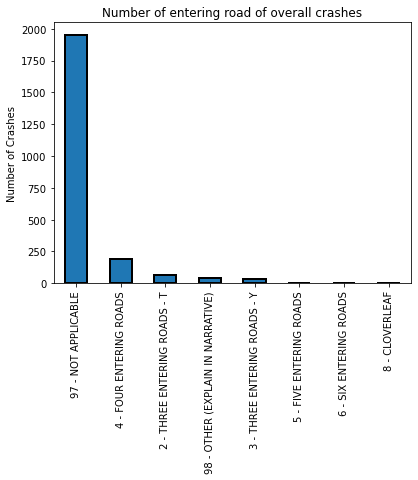

In [118]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

df_train['Number of Entering Roads'].value_counts().sort_values(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.ylabel('Number of Crashes',fontsize=10)
ax.tick_params(labelsize=10)
plt.title('Number of entering road of overall crashes',fontsize=12)

Text(0.5, 1.0, 'Intersecting Street Name of serious crashes')

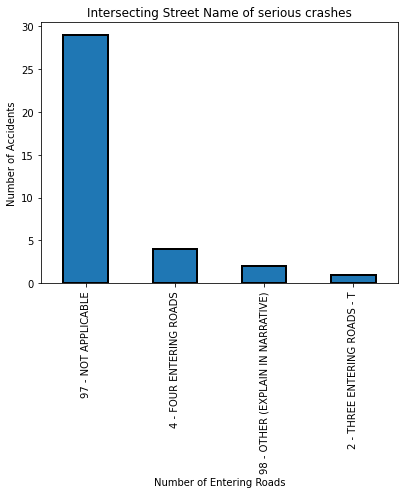

In [119]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

df_train[df_train['Crash Severity']=='Serious']['Number of Entering Roads'].value_counts().sort_values(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Number of Entering Roads',fontsize=10)
plt.ylabel('Number of Accidents',fontsize=10)
ax.tick_params(labelsize=10)
plt.title('Intersecting Street Name of serious crashes',fontsize=12)
# plt.grid()

In [120]:
cols = pd.get_dummies(df_train['Number of Entering Roads'], prefix= 'Number of Entering Roads')
df_train[cols.columns] = cols
df_train.drop('Number of Entering Roads', axis = 1, inplace = True)

### Feature: Number of Lanes

In [121]:
df_train['Number of Lanes'].value_counts(dropna = False)

8          1234
6           541
No Data     520
Name: Number of Lanes, dtype: int64

In [122]:
df_train['Number of Lanes'].mode()[0]

'8'

In [123]:
df_train['Number of Lanes'].replace('No Data', df_train['Number of Lanes'].mode()[0], inplace=True)

In [124]:
df_train['Number of Lanes'] = pd.to_numeric(df_train['Number of Lanes'], errors='coerce')

### Feature: Surface Condition

Text(0.5, 1.0, '5 Top Surface Conditions for all crashes')

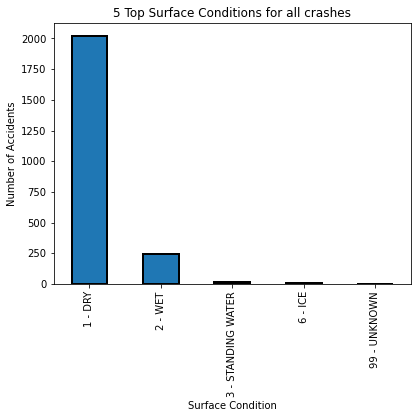

In [125]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

df_train['Surface Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Surface Condition',fontsize=10)
plt.ylabel('Number of Accidents',fontsize=10)
ax.tick_params(labelsize=10)
plt.title('5 Top Surface Conditions for all crashes',fontsize=12)

Text(0.5, 1.0, 'Surface Conditions for severe crashes')

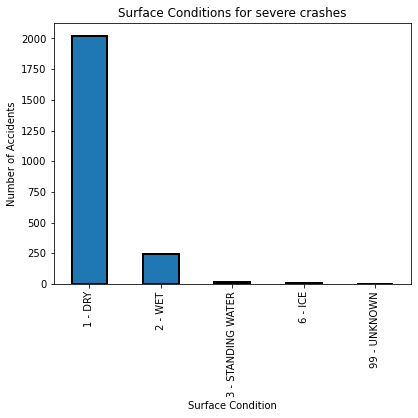

In [128]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

df_train['Surface Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Surface Condition',fontsize=10)
plt.ylabel('Number of Accidents',fontsize=10)
ax.tick_params(labelsize=10)
plt.title('Surface Conditions for severe crashes',fontsize=12)

In [129]:
df_train['Surface Condition'].value_counts(dropna = False)

1 - DRY                              2024
2 - WET                               246
3 - STANDING WATER                     14
6 - ICE                                 5
99 - UNKNOWN                            3
98 - OTHER (EXPLAIN IN NARRATIVE)       2
7 - SAND, MUD, DIRT                     1
Name: Surface Condition, dtype: int64

In [130]:
df_train[df_train['Surface Condition']=='99 - UNKNOWN']

,$1000 Damage to Any One Person's Property,Construction Zone Flag,Construction Zone Workers Present Flag,Number of Lanes,Surface Condition,Surface Width,Weather Condition,Crash Severity,Bridge Detail_CRASH INVOLVED UNDERPASS,Bridge Detail_NOT APPLICABLE,...,Manner of Collision_SAME DIRECTION - ONE STRAIGHT-ONE RIGHT TURN,Manner of Collision_SAME DIRECTION - ONE STRAIGHT-ONE STOPPED,Number of Entering Roads_2 - THREE ENTERING ROADS - T,Number of Entering Roads_3 - THREE ENTERING ROADS - Y,Number of Entering Roads_4 - FOUR ENTERING ROADS,Number of Entering Roads_5 - FIVE ENTERING ROADS,Number of Entering Roads_6 - SIX ENTERING ROADS,Number of Entering Roads_8 - CLOVERLEAF,Number of Entering Roads_97 - NOT APPLICABLE,Number of Entering Roads_98 - OTHER (EXPLAIN IN NARRATIVE)
401,1,1,1,8,99 - UNKNOWN,96,1 - CLEAR,Not serious,0,1,...,0,1,0,0,0,0,0,0,1,0
1650,1,1,1,8,99 - UNKNOWN,96,1 - CLEAR,Not serious,0,1,...,0,0,0,0,0,0,0,0,1,0
1949,1,1,1,8,99 - UNKNOWN,96,99 - UNKNOWN,Not serious,0,1,...,0,0,0,0,0,0,0,0,1,0


In [131]:
df_train.drop(df_train[(df_train['Surface Condition'] == '99 - UNKNOWN') & (df_train['Weather Condition'] == '99 - UNKNOWN')].index, inplace=True)

In [132]:
df_train[(df_train['Surface Condition']=='98 - OTHER (EXPLAIN IN NARRATIVE)') | (df_train['Surface Condition']=='99 - UNKNOWN')]

,$1000 Damage to Any One Person's Property,Construction Zone Flag,Construction Zone Workers Present Flag,Number of Lanes,Surface Condition,Surface Width,Weather Condition,Crash Severity,Bridge Detail_CRASH INVOLVED UNDERPASS,Bridge Detail_NOT APPLICABLE,...,Manner of Collision_SAME DIRECTION - ONE STRAIGHT-ONE RIGHT TURN,Manner of Collision_SAME DIRECTION - ONE STRAIGHT-ONE STOPPED,Number of Entering Roads_2 - THREE ENTERING ROADS - T,Number of Entering Roads_3 - THREE ENTERING ROADS - Y,Number of Entering Roads_4 - FOUR ENTERING ROADS,Number of Entering Roads_5 - FIVE ENTERING ROADS,Number of Entering Roads_6 - SIX ENTERING ROADS,Number of Entering Roads_8 - CLOVERLEAF,Number of Entering Roads_97 - NOT APPLICABLE,Number of Entering Roads_98 - OTHER (EXPLAIN IN NARRATIVE)
401,1,1,1,8,99 - UNKNOWN,96,1 - CLEAR,Not serious,0,1,...,0,1,0,0,0,0,0,0,1,0
813,1,1,1,6,98 - OTHER (EXPLAIN IN NARRATIVE),72,1 - CLEAR,Not serious,0,1,...,0,0,0,0,0,0,0,0,1,0
1426,1,1,1,8,98 - OTHER (EXPLAIN IN NARRATIVE),96,1 - CLEAR,Not serious,0,1,...,0,1,0,0,0,0,0,0,1,0
1650,1,1,1,8,99 - UNKNOWN,96,1 - CLEAR,Not serious,0,1,...,0,0,0,0,0,0,0,0,1,0


In [133]:
# Finding the most common surface condition based on weather condition for imputation
df_train.groupby(['Weather Condition']).agg(lambda x:x.value_counts().index[0])

,$1000 Damage to Any One Person's Property,Construction Zone Flag,Construction Zone Workers Present Flag,Number of Lanes,Surface Condition,Surface Width,Crash Severity,Bridge Detail_CRASH INVOLVED UNDERPASS,Bridge Detail_NOT APPLICABLE,Bridge Detail_STRUCTURE NOT HIT,...,Manner of Collision_SAME DIRECTION - ONE STRAIGHT-ONE RIGHT TURN,Manner of Collision_SAME DIRECTION - ONE STRAIGHT-ONE STOPPED,Number of Entering Roads_2 - THREE ENTERING ROADS - T,Number of Entering Roads_3 - THREE ENTERING ROADS - Y,Number of Entering Roads_4 - FOUR ENTERING ROADS,Number of Entering Roads_5 - FIVE ENTERING ROADS,Number of Entering Roads_6 - SIX ENTERING ROADS,Number of Entering Roads_8 - CLOVERLEAF,Number of Entering Roads_97 - NOT APPLICABLE,Number of Entering Roads_98 - OTHER (EXPLAIN IN NARRATIVE)
Weather Condition,,,,,,,,,,,,,,,,,,,,,
1 - CLEAR,1,1,1,8,1 - DRY,96,Not serious,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2 - CLOUDY,1,1,1,8,1 - DRY,96,Not serious,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3 - RAIN,1,1,1,8,2 - WET,96,Not serious,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4 - SLEET/HAIL,1,1,1,8,6 - ICE,96,Not serious,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5 - SNOW,1,1,1,8,6 - ICE,No Data,Not serious,0,1,0,...,0,1,0,0,0,0,0,0,1,0
6 - FOG,1,1,1,6,1 - DRY,72,Not serious,0,1,0,...,0,0,0,0,0,0,0,0,1,0
98 - OTHER (EXPLAIN IN NARRATIVE),1,1,1,8,2 - WET,96,Not serious,0,1,0,...,1,0,0,0,1,0,0,0,0,0


In [134]:
# Dry is found to be the frequently occuring surface condition for weather condition as clear which is used for imputation
df_train['Surface Condition'].replace('98 - OTHER (EXPLAIN IN NARRATIVE)', '1 - DRY', inplace=True)
df_train['Surface Condition'].replace('99 - UNKNOWN', '1 - DRY', inplace=True)

In [135]:
# We will convert Surface Condition into dummies post Weather Condition comparison
df_train['Surface Condition'].value_counts(dropna = False)

1 - DRY                2028
2 - WET                 246
3 - STANDING WATER       14
6 - ICE                   5
7 - SAND, MUD, DIRT       1
Name: Surface Condition, dtype: int64

### Feature: Surface Width


In [136]:
df_train['Surface Width'].value_counts(dropna = False)

96         1233
72          541
No Data     520
Name: Surface Width, dtype: int64

In [137]:
df_train['Surface Width'].mode()[0]

'96'

In [138]:
df_train['Surface Width'].replace('No Data', df_train['Surface Width'].mode()[0], inplace=True)

In [139]:
df_train['Surface Width'] = pd.to_numeric(df_train['Surface Width'], errors='coerce')

### Feature: Weather Condition

In [140]:
df_train['Weather Condition'].value_counts(dropna = False)

1 - CLEAR                            1792
2 - CLOUDY                            317
3 - RAIN                              179
6 - FOG                                 2
98 - OTHER (EXPLAIN IN NARRATIVE)       2
4 - SLEET/HAIL                          1
5 - SNOW                                1
Name: Weather Condition, dtype: int64

In [141]:
df_train.groupby(['Surface Condition']).agg(lambda x:x.value_counts().index[0])

,$1000 Damage to Any One Person's Property,Construction Zone Flag,Construction Zone Workers Present Flag,Number of Lanes,Surface Width,Weather Condition,Crash Severity,Bridge Detail_CRASH INVOLVED UNDERPASS,Bridge Detail_NOT APPLICABLE,Bridge Detail_STRUCTURE NOT HIT,...,Manner of Collision_SAME DIRECTION - ONE STRAIGHT-ONE RIGHT TURN,Manner of Collision_SAME DIRECTION - ONE STRAIGHT-ONE STOPPED,Number of Entering Roads_2 - THREE ENTERING ROADS - T,Number of Entering Roads_3 - THREE ENTERING ROADS - Y,Number of Entering Roads_4 - FOUR ENTERING ROADS,Number of Entering Roads_5 - FIVE ENTERING ROADS,Number of Entering Roads_6 - SIX ENTERING ROADS,Number of Entering Roads_8 - CLOVERLEAF,Number of Entering Roads_97 - NOT APPLICABLE,Number of Entering Roads_98 - OTHER (EXPLAIN IN NARRATIVE)
Surface Condition,,,,,,,,,,,,,,,,,,,,,
1 - DRY,1,1,1,8,96,1 - CLEAR,Not serious,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2 - WET,1,1,1,8,96,3 - RAIN,Not serious,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3 - STANDING WATER,1,1,1,8,96,3 - RAIN,Not serious,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6 - ICE,1,1,1,8,96,1 - CLEAR,Not serious,0,1,0,...,0,0,0,0,0,0,0,0,1,0
"7 - SAND, MUD, DIRT",1,0,1,8,96,2 - CLOUDY,Not serious,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [142]:
df_train[df_train['Weather Condition']=='98 - OTHER (EXPLAIN IN NARRATIVE)']

,$1000 Damage to Any One Person's Property,Construction Zone Flag,Construction Zone Workers Present Flag,Number of Lanes,Surface Condition,Surface Width,Weather Condition,Crash Severity,Bridge Detail_CRASH INVOLVED UNDERPASS,Bridge Detail_NOT APPLICABLE,...,Manner of Collision_SAME DIRECTION - ONE STRAIGHT-ONE RIGHT TURN,Manner of Collision_SAME DIRECTION - ONE STRAIGHT-ONE STOPPED,Number of Entering Roads_2 - THREE ENTERING ROADS - T,Number of Entering Roads_3 - THREE ENTERING ROADS - Y,Number of Entering Roads_4 - FOUR ENTERING ROADS,Number of Entering Roads_5 - FIVE ENTERING ROADS,Number of Entering Roads_6 - SIX ENTERING ROADS,Number of Entering Roads_8 - CLOVERLEAF,Number of Entering Roads_97 - NOT APPLICABLE,Number of Entering Roads_98 - OTHER (EXPLAIN IN NARRATIVE)
501,1,1,1,8,2 - WET,96,98 - OTHER (EXPLAIN IN NARRATIVE),Not serious,0,1,...,1,0,0,0,1,0,0,0,0,0
1622,1,1,1,8,1 - DRY,96,98 - OTHER (EXPLAIN IN NARRATIVE),Not serious,0,1,...,0,0,0,0,0,0,0,0,1,0


In [143]:
# Imputing based on frequently occuring weather condition based on surface condition
df_train['Weather Condition'] = np.where( (df_train['Surface Condition'] == '2 - WET') & (df_train['Weather Condition'] == '98 - OTHER (EXPLAIN IN NARRATIVE)'), '3 - RAIN', df_train['Weather Condition'])
df_train['Weather Condition'] = np.where( (df_train['Surface Condition'] == '1 - DRY') & (df_train['Weather Condition'] == '98 - OTHER (EXPLAIN IN NARRATIVE)'), '1 - CLEAR', df_train['Weather Condition'])

In [144]:
df_train['Weather Condition'].value_counts(dropna = False)

1 - CLEAR         1793
2 - CLOUDY         317
3 - RAIN           180
6 - FOG              2
4 - SLEET/HAIL       1
5 - SNOW             1
Name: Weather Condition, dtype: int64

In [145]:
# Label encoding - Replace with one-hot vector
cols = pd.get_dummies(df_train['Weather Condition'], prefix= 'Weather Condition')
df_train[cols.columns] = cols
df_train.drop('Weather Condition', axis = 1, inplace = True)

In [146]:
# Label encoding - Replace with one-hot vector
cols = pd.get_dummies(df_train['Surface Condition'], prefix= 'Surface Condition')
df_train[cols.columns] = cols
df_train.drop('Surface Condition', axis = 1, inplace = True)

### Target Variable: Crash Severity

Crash Severity proportions are
 Not serious    0.984307
Serious        0.015693
Name: Crash Severity, dtype: float64


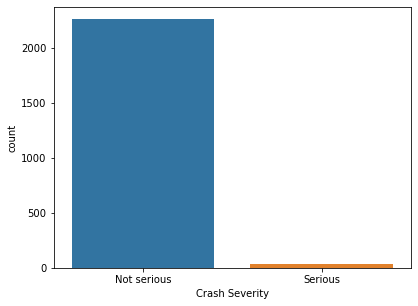

In [147]:
import seaborn as sns
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

sns.countplot(df_train['Crash Severity']);
print ('Crash Severity proportions are\n',df_train['Crash Severity'].value_counts() / df_train['Crash Severity'].count())

Its not a well balanced dataset since its in 98:2 ratio so ``roc_auc`` can be considered as a better evaluation criterion in this context


In [148]:
df_train['Crash Severity'].value_counts(dropna=False)

Not serious    2258
Serious          36
Name: Crash Severity, dtype: int64

In [149]:
df_train['Crash Severity'] = df_train['Crash Severity'].map({'Serious':1, 'Not serious':0}).astype(int)

In [150]:
df_train['Crash Severity'].value_counts(dropna=False)

0    2258
1      36
Name: Crash Severity, dtype: int64

# Preprocessing ``test.csv``

In [151]:
# Import dataset using pandas csv reader
df_test = pd.read_csv('test.csv')
df_test.head()

,$1000 Damage to Any One Person's Property,Bridge Detail,Construction Zone Flag,Construction Zone Workers Present Flag,Crash Time,Day of Week,Highway System,Intersecting Highway Number,Intersecting Street Name,Manner of Collision,Median Type,Median Width,Number of Entering Roads,Number of Lanes,Surface Condition,Surface Type,Surface Width,Weather Condition
0,Yes,NOT APPLICABLE,No,No,720,THURSDAY,STATE SPUR,No Data,NaN,SAME DIRECTION - BOTH GOING STRAIGHT-REAR END,No Data,No Data,97 - NOT APPLICABLE,No Data,1 - DRY,No Data,No Data,1 - CLEAR
1,Yes,NOT APPLICABLE,No,No,908,MONDAY,STATE SPUR,345,IH0345,SAME DIRECTION - ONE STRAIGHT-ONE STOPPED,No Data,40,97 - NOT APPLICABLE,8,1 - DRY,No Data,96,1 - CLEAR
2,Yes,NOT APPLICABLE,No,No,1705,FRIDAY,STATE SPUR,No Data,NaN,ONE MOTOR VEHICLE - GOING STRAIGHT,No Data,40,97 - NOT APPLICABLE,6,1 - DRY,No Data,72,1 - CLEAR
3,Yes,NOT APPLICABLE,No,No,110,TUESDAY,STATE SPUR,No Data,NaN,SAME DIRECTION - BOTH GOING STRAIGHT-SIDESWIPE,No Data,40,97 - NOT APPLICABLE,8,1 - DRY,No Data,96,1 - CLEAR
4,Yes,NOT APPLICABLE,No,No,1550,SATURDAY,STATE SPUR,No Data,NaN,SAME DIRECTION - BOTH GOING STRAIGHT-REAR END,No Data,40,97 - NOT APPLICABLE,8,1 - DRY,No Data,96,1 - CLEAR


In [152]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   $1000 Damage to Any One Person's Property  774 non-null    object
 1   Bridge Detail                              774 non-null    object
 2   Construction Zone Flag                     774 non-null    object
 3   Construction Zone Workers Present Flag     774 non-null    object
 4   Crash Time                                 774 non-null    int64 
 5   Day of Week                                774 non-null    object
 6   Highway System                             774 non-null    object
 7   Intersecting Highway Number                774 non-null    object
 8   Intersecting Street Name                   176 non-null    object
 9   Manner of Collision                        774 non-null    object
 10  Median Type                           

In [153]:
df_test['$1000 Damage to Any One Person\'s Property'] = df_test['$1000 Damage to Any One Person\'s Property'].map({'Yes':1, 'No':0}).astype(int)

In [154]:
cols = pd.get_dummies(df_test['Bridge Detail'], prefix= 'Bridge Detail')
df_test[cols.columns] = cols
df_test.drop('Bridge Detail', axis = 1, inplace = True)

In [155]:
df_test['Construction Zone Flag'] = df_test['Construction Zone Flag'].map({'No':1, 'Yes':0}).astype(int)

In [156]:
df_test['Construction Zone Workers Present Flag'] = df_test['Construction Zone Workers Present Flag'].map({'No':1, 'Yes':0}).astype(int)

In [157]:
df_test['Crash Time'] = df_test['Crash Time'].apply(lambda x: "early morning" if x >=0 and x<= 600  else ('morning' if x >=601 and x<= 1200 else 'noon' if x >=1201 and x<= 1750 else 'night') )

In [158]:
cols = pd.get_dummies(df_test['Crash Time'], prefix= 'Crash Time')
df_test[cols.columns] = cols
df_test.drop('Crash Time', axis = 1, inplace = True)

In [159]:
df_test['Day of Week'] = df_test['Day of Week'].apply(lambda x: "Week Beginning" if x =='MONDAY' or x=='TUESDAY' else ('Mid Week' if x == 'WEDNESDAY' or x == 'THURSDAY' else 'Week End') )

In [160]:
cols = pd.get_dummies(df_test['Day of Week'], prefix= 'Day of Week')
df_test[cols.columns] = cols
df_test.drop('Day of Week', axis = 1, inplace = True)

In [161]:
cols = pd.get_dummies(df_test['Manner of Collision'], prefix= 'Manner of Collision')
df_test[cols.columns] = cols
df_test.drop('Manner of Collision', axis = 1, inplace = True)

In [162]:
cols = pd.get_dummies(df_test['Number of Entering Roads'], prefix= 'Number of Entering Roads')
df_test[cols.columns] = cols
df_test.drop('Number of Entering Roads', axis = 1, inplace = True)

In [163]:
df_test.drop('Highway System', axis=1, inplace=True)
df_test.drop('Intersecting Highway Number', axis=1, inplace=True)
df_test.drop('Intersecting Street Name', axis=1, inplace=True)

df_test.drop('Median Width', axis=1, inplace=True)
df_test.drop('Median Type', axis=1, inplace=True)
df_test.drop('Surface Type', axis=1, inplace=True)

In [164]:
# Replace no data in test with that of the mode of the same in train dataset
df_test['Surface Width'].replace('No Data', df_train['Surface Width'].mode()[0], inplace=True)

In [165]:
# Replace no data in test with that of the mode of the same in train dataset
df_test['Number of Lanes'].replace('No Data', df_train['Number of Lanes'].mode()[0], inplace=True)

In [166]:
df_test['Number of Lanes'] = pd.to_numeric(df_test['Number of Lanes'], errors='coerce')

In [167]:
df_test['Surface Width'] = pd.to_numeric(df_test['Surface Width'], errors='coerce')

In [168]:
df_test.drop(df_test[(df_test['Surface Condition'] == '99 - UNKNOWN') & (df_test['Weather Condition'] == '99 - UNKNOWN')].index, inplace=True)

In [169]:
df_test['Surface Condition'].replace('98 - OTHER (EXPLAIN IN NARRATIVE)', '1 - DRY', inplace=True)
df_test['Surface Condition'].replace('99 - UNKNOWN', '1 - DRY', inplace=True)

In [170]:
df_test['Weather Condition'] = np.where( (df_test['Surface Condition'] == '2 - WET') & (df_test['Weather Condition'] == '98 - OTHER (EXPLAIN IN NARRATIVE)'), '3 - RAIN', df_test['Weather Condition'])
df_test['Weather Condition'] = np.where( (df_test['Surface Condition'] == '1 - DRY') & (df_test['Weather Condition'] == '98 - OTHER (EXPLAIN IN NARRATIVE)'), '1 - CLEAR', df_test['Weather Condition'])

In [171]:
# Label encoding - Replace with one-hot vector
cols = pd.get_dummies(df_test['Surface Condition'], prefix= 'Surface Condition')
df_test[cols.columns] = cols
df_test.drop('Surface Condition', axis = 1, inplace = True)

In [172]:
cols = pd.get_dummies(df_test['Weather Condition'], prefix= 'Weather Condition')
df_test[cols.columns] = cols
df_test.drop('Weather Condition', axis = 1, inplace = True)

In [173]:
# Including the remaining catgorical cols in train into test set later to be filled by zeroes 
df_test = df_test.reindex(labels=df_train.columns,axis=1)

In [174]:
float_columns = [col for col in df_test.columns.values if df_test[col].dtype == 'float64'  ]

In [175]:
float_columns

['Crash Severity',
 'Bridge Detail_CRASH INVOLVED UNDERPASS',
 'Bridge Detail_VEHICLE WENT OVER RAIL',
 'Manner of Collision_ANGLE - ONE RIGHT TURN-ONE STOPPED',
 'Manner of Collision_ANGLE - ONE STRAIGHT-ONE STOPPED',
 'Manner of Collision_OPPOSITE DIRECTION - ONE LEFT TURN-ONE STOPPED',
 'Manner of Collision_OPPOSITE DIRECTION - ONE STRAIGHT-ONE BACKING',
 'Number of Entering Roads_5 - FIVE ENTERING ROADS',
 'Weather Condition_4 - SLEET/HAIL',
 'Weather Condition_5 - SNOW',
 'Surface Condition_7 - SAND, MUD, DIRT']

In [176]:
for col in float_columns:
    df_test[col] = df_test[col].fillna(0).astype(int)

In [177]:
df_test.drop('Crash Severity', axis = 1, inplace = True)

In [178]:
df_test.shape

(774, 60)

In [179]:
df_train.shape

(2294, 61)

In [245]:
df_train.head(5)

,$1000 Damage to Any One Person's Property,Construction Zone Flag,Construction Zone Workers Present Flag,Number of Lanes,Surface Width,Crash Severity,Bridge Detail_CRASH INVOLVED UNDERPASS,Bridge Detail_NOT APPLICABLE,Bridge Detail_STRUCTURE NOT HIT,Bridge Detail_VEHICLE RETAINED ON BRIDGE OR OVERPASS,...,Weather Condition_2 - CLOUDY,Weather Condition_3 - RAIN,Weather Condition_4 - SLEET/HAIL,Weather Condition_5 - SNOW,Weather Condition_6 - FOG,Surface Condition_1 - DRY,Surface Condition_2 - WET,Surface Condition_3 - STANDING WATER,Surface Condition_6 - ICE,"Surface Condition_7 - SAND, MUD, DIRT"
0,1,1,1,8,96,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,1,8,96,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,1,1,8,96,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3,1,1,1,8,96,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,1,1,8,96,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [242]:
df_test.head(5)

,$1000 Damage to Any One Person's Property,Construction Zone Flag,Construction Zone Workers Present Flag,Number of Lanes,Surface Width,Bridge Detail_CRASH INVOLVED UNDERPASS,Bridge Detail_NOT APPLICABLE,Bridge Detail_STRUCTURE NOT HIT,Bridge Detail_VEHICLE RETAINED ON BRIDGE OR OVERPASS,Bridge Detail_VEHICLE WENT OVER RAIL,...,Weather Condition_2 - CLOUDY,Weather Condition_3 - RAIN,Weather Condition_4 - SLEET/HAIL,Weather Condition_5 - SNOW,Weather Condition_6 - FOG,Surface Condition_1 - DRY,Surface Condition_2 - WET,Surface Condition_3 - STANDING WATER,Surface Condition_6 - ICE,"Surface Condition_7 - SAND, MUD, DIRT"
0,1,1,1,8,96,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,1,8,96,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,1,1,6,72,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,1,8,96,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,1,1,8,96,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Machine learning models

In [180]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [181]:
# Crash Severity is the target column and all other columns are the regressors
X = df_train.drop(columns = ['Crash Severity'])
y = df_train['Crash Severity'].values

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [183]:
# Using MinMax scaler to scale the data owing to the presence of more dummy variables and to preserve the distribution in the imbalanced dataset and since Stdscaler might normalized the distribution
Scaler = MinMaxScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)
df_test_scaled = Scaler.transform(df_test)

### KNN

In [184]:
# Since this dataset has ~2200 records, limited n_neighbours of range 1-15 and both euclidean and manhattan distance metric is considered
param_grid = {"n_neighbors": np.arange(1,15), 'weights': ['uniform', 'distance'], 'metric' : ['euclidean', 'manhattan', 'minkowski']}

In [185]:
knn = KNeighborsClassifier()
grid_clf = GridSearchCV(knn, param_grid, cv = 5, return_train_score=True, n_jobs = -1, scoring= 'roc_auc')
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='roc_auc')

In [186]:
print("Best parameters: {}".format(grid_clf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_clf.best_score_))
print("ROC-AUC Train score: {:.4f}".format(grid_clf.score(X_train, y_train)))
print("ROC-AUC Test score: {:.4f}".format(grid_clf.score(X_test, y_test)))

Best parameters: {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}
Best cross-validation score: 0.5525
ROC-AUC Train score: 0.8940
ROC-AUC Test score: 0.4729


### Logistic Regression

In [187]:
param_grid = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 70 , 80, 100], 'solver' : ['lbfgs', 'liblinear', 'newton-cg'], 'max_iter': [80, 100, 150, 200, 300]}

In [188]:
grid_clf = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv = 5, return_train_score=True, n_jobs = -1, scoring= 'roc_auc')
grid_clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# final1 = minmax scaler
y_pred = grid_clf.predict(X_test)
print("Best parameters: {}".format(grid_clf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_clf.best_score_))
print("ROC AUC Train score: {:.4f}".format(grid_clf.score(X_train, y_train)))
print("ROC AUC Test score: {:.4f}".format(grid_clf.score(X_test, y_test)))

### Linear SVC

In [ ]:
param_grid = {'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0],'penalty':['l1','l2'], 'max_iter': [100, 200, 300]}

In [ ]:
grid_clf = GridSearchCV(LinearSVC(random_state=0), param_grid, cv = 5, return_train_score=True, n_jobs=-1, scoring= 'roc_auc')
grid_clf.fit(X_train, y_train)

In [ ]:
y_pred = grid_clf.predict(X_test)
print("Best parameters: {}".format(grid_clf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_clf.best_score_))
print("ROC AUC Train score: {:.4f}".format(grid_clf.score(X_train, y_train)))
print("ROC AUC Test score: {:.4f}".format(grid_clf.score(X_test, y_test)))

### Kernalized SVC (rbf, poly, linear)

### SVC Kernel Linear

In [ ]:
param_grid = {'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'kernel':['linear'], 'max_iter': [100, 200, 300]}

In [ ]:
# Recall score is the chosen evaluation criterion
grid_clf = GridSearchCV(SVC(random_state=0), param_grid, cv = 5, return_train_score=True, n_jobs=-1, scoring= 'roc_auc')
grid_clf.fit(X_train, y_train)

In [ ]:
y_pred = grid_clf.predict(X_test)
print("Best parameters: {}".format(grid_clf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_clf.best_score_))
print("ROC AUC Train score: {:.4f}".format(grid_clf.score(X_train, y_train)))
print("ROC AUC Test score: {:.4f}".format(grid_clf.score(X_test, y_test)))

### SVC Kernel rbf

In [ ]:
param_grid = {'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0],'gamma':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'kernel':['rbf'], 'max_iter': [100, 200, 300]}

In [ ]:
grid_clf = GridSearchCV(SVC(random_state=0), param_grid, cv = 5, return_train_score=True, n_jobs=-1, scoring= 'roc_auc')
grid_clf.fit(X_train, y_train)

In [ ]:
y_pred = grid_clf.predict(X_test)
print("Best parameters: {}".format(grid_clf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_clf.best_score_))
print("ROC AUC Train score: {:.4f}".format(grid_clf.score(X_train, y_train)))
print("ROC AUC Test score: {:.4f}".format(grid_clf.score(X_test, y_test)))

### SVC Kernel poly

In [ ]:
param_grid = {'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0],'gamma':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'degree':[2, 3, 4, 5], 'kernel':['poly'], 'max_iter': [100, 200, 300]}

In [ ]:
grid_clf = GridSearchCV(SVC(random_state=0), param_grid, cv = 5, return_train_score=True, n_jobs=-1, scoring= 'roc_auc')
grid_clf.fit(X_train, y_train)

In [ ]:
y_pred = grid_clf.predict(X_test)
print("Best parameters: {}".format(grid_clf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_clf.best_score_))
print("ROC AUC Train score: {:.4f}".format(grid_clf.score(X_train, y_train)))
print("ROC AUC Test score: {:.4f}".format(grid_clf.score(X_test, y_test)))

### Decision Tree Classifier

In [ ]:
param_grid = {"criterion": ['gini', 'entropy'], 'max_depth': np.arange(2,26), 'max_leaf_nodes' : np.arange(1,26)}

In [ ]:
grid_clf = GridSearchCV(DecisionTreeClassifier(random_state = 0), param_grid, cv = 5, return_train_score=True, n_jobs=-1, scoring= 'roc_auc')
grid_clf.fit(X_train, y_train)

In [ ]:
y_pred = grid_clf.predict(X_test)
print("Best parameters: {}".format(grid_clf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_clf.best_score_))
print("ROC AUC Train score: {:.4f}".format(grid_clf.score(X_train, y_train)))
print("ROC AUC Test score: {:.4f}".format(grid_clf.score(X_test, y_test)))

### Random Forest Classifier

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(2,26), 'max_leaf_nodes': np.arange(2,26)}

In [ ]:
grid_clf = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv = 5, n_jobs = -1, scoring = 'roc_auc', return_train_score=True)
grid_clf.fit(X_train, y_train)

In [ ]:
y_pred = grid_clf.predict(X_test)
print("Best parameters: {}".format(grid_clf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_clf.best_score_))
print("ROC AUC Train score: {:.4f}".format(grid_clf.score(X_train, y_train)))
print("ROC AUC Test score: {:.4f}".format(grid_clf.score(X_test, y_test)))

Since Logistic regression seems to perform better with a high ROC AUC Train score: 0.8485 and ROC AUC Test score: 0.7733 and that of a least gap between train and test score.
Hence Logistic Regression is chosen as a base model for the ensemble models

### ENSEMBLE MODELS

### Bagging Classifier with Bagging

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

param_grid = {'n_estimators':[2, 3, 4, 5, 8, 10],
              'max_samples':[0.01, 0.05, 0.1], 
              'max_features':[0, 0.01, 0.001, 0.1, 0.5, 1]}

bag_clf = BaggingClassifier(LogisticRegression(C=100, max_iter=100, penalty='l2', solver='lbfgs', random_state=0), bootstrap=True, random_state=0)
grid_clf = GridSearchCV(bag_clf, param_grid = param_grid, cv = 5, scoring="roc_auc", n_jobs=-1)
grid_clf.fit(X_train, y_train)

In [ ]:
y_pred = grid_clf.predict(X_test)
print("Best parameters: {}".format(grid_clf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_clf.best_score_))
print("ROC AUC Train score: {:.4f}".format(grid_clf.score(X_train, y_train)))
print("ROC AUC Test score: {:.4f}".format(grid_clf.score(X_test, y_test)))

### Bagging Classifier with Pasting

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

param_grid = {'n_estimators':[2, 3, 4, 5, 8, 10],
              'max_samples':[0.01, 0.05, 0.1, 0.5, 1], 
              'max_features':[0.01, 0.05, 0.1, 0.5, 1]}

bag_clf = BaggingClassifier(LogisticRegression(C=100, max_iter=100, penalty='l2', solver='lbfgs', random_state=0), bootstrap=False, random_state=0)
grid_clf = GridSearchCV(bag_clf, param_grid = param_grid, cv = 5, scoring="roc_auc")
grid_clf.fit(X_train, y_train)

In [ ]:
y_pred = grid_clf.predict(X_test)
print("Best parameters: {}".format(grid_clf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_clf.best_score_))
print("ROC AUC Train score: {:.4f}".format(grid_clf.score(X_train, y_train)))
print("ROC AUC Test score: {:.4f}".format(grid_clf.score(X_test, y_test)))

### AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

param_grid = {'learning_rate':[0.1, 0.5, 1],
              'n_estimators':[10, 20, 30, 40, 50]}

ada_clf = AdaBoostClassifier(base_estimator = LogisticRegression(C=100, max_iter=100, penalty='l2', solver='lbfgs', random_state = 0))
grid_clf = GridSearchCV(ada_clf, param_grid = param_grid, cv = 5, n_jobs=-1, scoring="roc_auc")
grid_clf.fit(X_train, y_train)

In [ ]:
y_pred = grid_clf.predict(X_test)
print("Best parameters: {}".format(grid_clf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_clf.best_score_))
print("ROC AUC Train score: {:.4f}".format(grid_clf.score(X_train, y_train)))
print("ROC AUC Test score: {:.4f}".format(grid_clf.score(X_test, y_test)))

### PCA

In [ ]:
X_train.shape

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# After dimensionality reduction
pca.n_components_

### Post PCA

### Logistic regression

In [ ]:
param_grid = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 5, 10, 100, 1000], 'solver' : ['lbfgs', 'liblinear', 'newton-cg'], 'max_iter': [15, 20, 40, 80, 100]}

In [ ]:
grid_clf = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv = 5, return_train_score=True, n_jobs = -1, scoring= 'roc_auc')
grid_clf.fit(X_train_pca, y_train)

In [ ]:
y_pred = grid_clf.predict(X_test_pca)
print("Best parameters: {}".format(grid_clf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_clf.best_score_))
print("ROC AUC Train score: {:.4f}".format(grid_clf.score(X_train_pca, y_train)))
print("ROC AUC Test score: {:.4f}".format(grid_clf.score(X_test_pca, y_test)))

### Random Forest Classifier

In [ ]:
param_grid = {"criterion": ['gini', 'entropy'], 'max_depth': np.arange(1,26), 'max_leaf_nodes' : np.arange(1,26)}

grid_clf = GridSearchCV(RandomForestClassifier(random_state = 0), param_grid, cv = 5, return_train_score=True, n_jobs=-1, scoring= 'roc_auc')
grid_clf.fit(X_train_pca, y_train)

In [ ]:
print("Best parameters: {}".format(grid_clf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_clf.best_score_))
print("ROC AUC Train score: {:.4f}".format(grid_clf.score(X_train_pca, y_train)))
print("ROC AUC Test score: {:.4f}".format(grid_clf.score(X_test_pca, y_test)))

<div class="alert alert-block alert-info">
PCA hasnt helped much in improving the train and test scores of the narrowed down models. It doesnt seem to be a good candidate for this classification dataset which might be due to the reason that PCA can lose some spatial information which might have been important for this classification.
</div>

### ANN - MLP

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

# Sigmoid activation function for output layer since this is a binary classification model
model.add(Dense(60, input_dim = 60, activation='relu', name = 'input_layer'))
model.add(Dense(1, activation = 'sigmoid', name = 'output_layer'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics=[tf.keras.metrics.AUC()])
model.fit(X_train, y_train, batch_size=128, epochs=12)

In [ ]:
# Model evaluation
loss_and_metrics = model.evaluate(X_test, y_test)

print(loss_and_metrics)

print("Test Loss", loss_and_metrics[0])
print("ROC-AUC score", loss_and_metrics[1])

### Post Processing

<div class="alert alert-block alert-info">
Of all the models run so far, the following models provide high cross-validation score, train and test scores
    
 <b>Logistic Regression: roc_auc train score of 0.8485, roc_auc test score of 0.7733 </b>
    
 <b> Linear SVC: roc_auc train score of 0.7570, roc_auc test score of 0.7441</b>

   
Despite LinearSVC showing high as well as least gap between train and test scores, Logistic Regression is the chosen model
since it produces high test score than LinearSVC which is crucial in determining model generalization to unseen data. Hence Logistic Regression results are post processed further</div>

In [189]:
logReg = LogisticRegression(C=100, max_iter=100, penalty='l2', solver='lbfgs')
logReg.fit(X_train, y_train)

LogisticRegression(C=100)

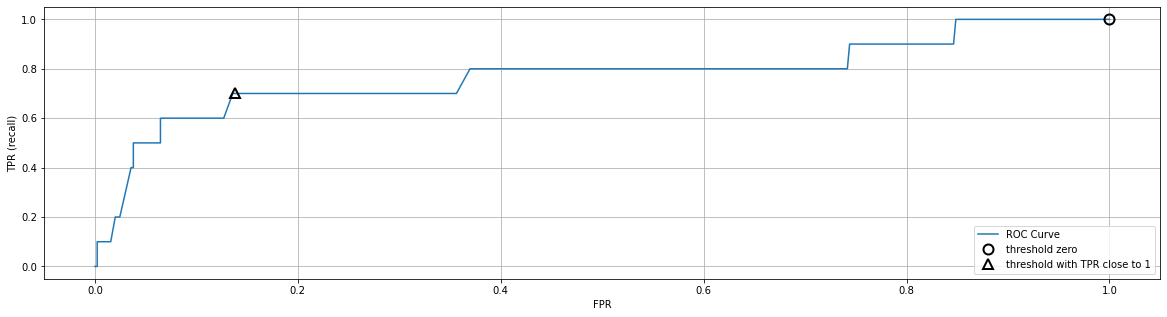

In [190]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logReg.predict_proba(X_test)[:, 1])

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closest to zero for decision function
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)

close_default_rf = np.argmin(np.abs(fpr-0.14))
plt.plot(fpr[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="threshold with TPR close to 1", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)
plt.grid()

In [191]:
# Default threshold 0.5 
y_pred = logReg.predict(X_test)
roc_auc_score(y_test, logReg.predict_proba(X_test)[:,1])

0.7732739420935413

In [192]:
# Threshold Index close to 0.1 FPR 
np.argmin(np.abs(fpr-0.1))

18

In [193]:
# Predictions based on altered threshold close to 0.1 FPR 
y_predict = np.where(logReg.predict_proba(X_test)[:, 1] >= thresholds[18], 1, 0)
roc_auc_score(y_test, y_predict)

0.7532293986636971

In [194]:
# Threshold index close to 0.14 FPR 
np.argmin(np.abs(fpr-0.14))

25

In [195]:
# Predictions based on altered threshold close to 0.14 FPR 
y_predict = np.where(logReg.predict_proba(X_test)[:, 1] >= thresholds[25], 1, 0)
roc_auc_score(y_test, y_predict)

0.7809576837416481

<div class="alert alert-block alert-info">
After post processing the results, threshold index 25 with threshold ~0.14 seems to provide a better roc_auc test score of 0.7809 which is better than roc_auc test score of 0.7532 for default threshold of 0.5 for logistic regression model </div>

# Best model ( 5 points)
Explain which machine learning model is the best model for this dataset and why? 

<div class="alert alert-block alert-info">
    <b>JUSTIFICATION OF BEST MODEL:</b>
   
To predict Crash Severity, based on suggested <b>roc-auc score</b> evaluation criterion for this business context <b>logistic regression</b> seems to perform better

Of all the models run so far, the following models provide high cross-validation score, train and test scores
    
Logistic Regression - roc_auc train score of 0.8485 and roc_auc test score of 0.7733
    
Linear SVC - roc_auc train score of 0.7570 and roc_auc test score of 0.7441
    
   
Despite LinearSVC showing high train and test scores as well as least gap between them, Logistic Regression is the chosen model
since it produces high test score than LinearSVC which is crucial in determining model generalization to unseen data
    
By running Grid Search for different models and by playing around corresponding hyper-parameters, it is evident that logistic regression model seems to perform better in this case with a high roc_auc <b>Train score: 0.8485 and Test score: 0.7809 (post-processing)</b> and a least gap between them without dimensionality reduction and the best hyper-parameters chosen are {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}.  With this lets predict the crash severity target values for the test dataset.</div>


In [238]:
# By applying the best hyperparameters found by using Grid Search, lets train the chosen model on entire dataset to predict the crash severity label for test dataset
final_model = LogisticRegression(C=100, max_iter=100, penalty='l2', solver='lbfgs')
final_model.fit(X, y)

from sklearn.ensemble import BaggingClassifier
test_model = BaggingClassifier((LogisticRegression(C=100, max_iter=100, penalty='l2', solver='lbfgs', random_state=0)), bootstrap= False, random_state=0)
test_model.fit(X, y)

# Predictions after post-processing based on the best threshold identified
final_test_prediction = np.where(logReg.predict_proba(df_test_scaled)[:, 1] >= thresholds[25], 1, 0)

In [239]:
roc_auc_score(actual_y_test, test_model.predict_proba(df_test_scaled)[:, 1])

0.4231020942408378

In [216]:
roc_auc_score(actual_y_test, final_test_prediction)

0.48324607329842934

In [217]:
roc_auc_score(actual_y_test, logReg.predict_proba(df_test_scaled)[:, 1])

0.46328534031413604

# Final Pediction

In [197]:
print('Predictions for the test dataset is :\n', final_test_prediction)

Predictions for the test dataset is :
 [0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 

In [198]:
final_test_prediction.shape

(774,)

In [209]:
actual_y_test = pd.read_csv('y_test.csv')
actual_y_test = actual_y_test['Crash Severity'].replace({'Not serious': 0, 'Serious':1}).values.reshape(-1,)
#print(actual_y_test.shape)

In [213]:
actual_y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [211]:
roc_auc_score(actual_y_test, final_test_prediction)

0.48324607329842934

In [214]:
roc_auc_score(actual_y_test, final_test_prediction)

0.48324607329842934

In [215]:
roc_auc_score(actual_y_test, logReg.predict_proba(df_test_scaled)[:, 1])

0.46328534031413604

In [218]:
logReg.predict_proba(df_test_scaled)[:, 1]

array([3.26132819e-03, 8.78871697e-03, 6.15582510e-02, 6.79742256e-03,
       3.15658143e-03, 2.70667771e-02, 8.99913223e-04, 7.55387106e-03,
       1.70477335e-02, 6.27449245e-03, 1.52772498e-02, 8.85150603e-04,
       1.51506254e-02, 1.75874198e-03, 1.33843128e-02, 5.63997842e-02,
       5.16806520e-03, 7.32443597e-03, 9.39157109e-03, 1.75427913e-03,
       6.22325445e-03, 1.14679230e-03, 1.53087645e-03, 1.01443523e-03,
       3.67525591e-03, 8.36122362e-03, 6.15578359e-03, 6.22325445e-03,
       1.27114546e-01, 3.15658143e-03, 5.00238555e-03, 2.60629978e-02,
       8.88109099e-03, 8.11008937e-05, 5.97873459e-02, 1.70713015e-04,
       9.97444602e-05, 1.13260844e-02, 7.01046575e-03, 1.61875149e-02,
       1.09189865e-02, 2.38864677e-03, 9.39157109e-03, 2.40216480e-02,
       1.05752941e-02, 2.12266028e-04, 7.65598178e-03, 5.87655613e-04,
       6.31814994e-04, 5.19244381e-03, 2.52747399e-05, 8.70943699e-04,
       5.82258226e-03, 7.74343685e-02, 3.15658143e-03, 8.47107470e-04,
      

In [219]:
np.where(logReg.predict_proba(df_test_scaled)[:, 1] >= thresholds[25], 1, 0)

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,